In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime #importing datetime and date functionality for RIPA data (and possible Google Data)
from datetime import datetime
from datetime import date

import statsmodels as sm
import statsmodels.formula.api as smf

In [157]:
#importing the client referrals table
path = "/Users/Andrew/Documents/School/Fall 2022 Graduate UCSD/Capstone/Data/csv_exports/CIE/Client_Demographics_Table_1.csv"
demographics = pd.read_csv(path)

In [158]:
#quickly renaming columns
old_column_names = list(demographics.columns.values)

#doing quick list comprehension-based string replacing (blanks to _)
new_column_names = [name.replace(" ", "_") for name in old_column_names]
new_column_names = [name.replace("/", "__") for name in new_column_names]

#converting into quick dictionary for replacing old column names with new column names
rename_dict = {i:j for i,j in zip(old_column_names,new_column_names)}
demographics = demographics.rename(columns = rename_dict)

In [159]:
#looking at first 5 within dataframe
demographics.head()

,AccountID,Account_Created_Date,Record_Type,CIE_Consent,Zip,Neighborhood,HHSA_Region,County,Housing_Needs,Utilities_Needs,...,TANF,Rental_Assistance,Military__Veteran,Employment,Education,Health_Insurance,Health_Insurance_Type,Health_Plan,Homeless,Housing_Type
0,0012M000021P37VQAS,11/18/18,Client,No Consent,92040.0,LAKESIDE,East,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,Some College No Degree,Yes,Medi-Cal,Molina,Missing,Missing
1,0012M000021P9NyQAK,11/18/18,Client,No Consent,92064.0,POWAY,North Inland,San Diego,Yes,Yes,...,No,No,Not Military/Veteran,Unable to work,Associate Degree,Yes,Medi-Cal,Other,Yes,Unsheltered
2,0012M000021Pa72QAC,11/19/18,Client,Consent,92071.0,SANTEE,East,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,High School Degree,Yes,Employer Provided,Missing,Missing,Missing
3,0012M000021Pa8AQAS,11/19/18,Client,Consent,92110.0,"SD, OLD TOWN",North Central,San Diego,No,No,...,Missing,Missing,Not Military/Veteran,Missing,Missing,No,No Insurance,Missing,Yes,Homeless Unspecified
4,0012M000021PalPQAS,11/19/18,Client,Consent,91910.0,CHULA VISTA,South,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,Bachelor's Degree,Yes,Employer Provided,Missing,Missing,Missing


In [160]:
#pulling descriptive statistics of basic numeric columns
#converting columns to numeric if possible
for column in demographics.columns:
    try:
        column = column.to_numeric()
    except:
        continue

demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121066 entries, 0 to 121065
Data columns (total 45 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   AccountID                                      121066 non-null  object 
 1   Account_Created_Date                           121066 non-null  object 
 2   Record_Type                                    121066 non-null  object 
 3   CIE_Consent                                    121066 non-null  object 
 4   Zip                                            111104 non-null  float64
 5   Neighborhood                                   109724 non-null  object 
 6   HHSA_Region                                    109113 non-null  object 
 7   County                                         121066 non-null  object 
 8   Housing_Needs                                  116208 non-null  object 
 9   Utilities_Needs                      

In [161]:
demographics.describe()

,Zip,Age,Monthly_Income,FPL,Household_Size
count,111104.000000,110510.000000,101148.000000,100274.000000,104556.000000
mean,91707.170219,47.463288,1367.750949,84.974749,2.473421
std,5551.655960,15.764840,1337.956636,79.995826,2.591598
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92019.000000,35.000000,300.000000,19.000000,1.000000
50%,92071.000000,46.000000,1061.000000,78.000000,2.000000
75%,92113.000000,59.000000,2000.000000,122.000000,3.000000
max,99950.000000,121.000000,19999.000000,1786.000000,640.000000


In [162]:
demographics.nunique()

AccountID                                        121066
Account_Created_Date                               1465
Record_Type                                           4
CIE_Consent                                           2
Zip                                                 582
Neighborhood                                        100
HHSA_Region                                           6
County                                                2
Housing_Needs                                         2
Utilities_Needs                                       2
Medical_Needs                                         2
Eviction_Needs                                        2
At_Risk_of_Losing_Housing_Assessment                  2
Financial_Barriers_Assessment                         2
Eviction__3-day_pay_or_quit_notice_Assessment         2
Gender                                                4
Gender_Identity                                       8
Age                                             

In [163]:
demographics[demographics.duplicated('AccountID')]
#no repeats

,AccountID,Account_Created_Date,Record_Type,CIE_Consent,Zip,Neighborhood,HHSA_Region,County,Housing_Needs,Utilities_Needs,...,TANF,Rental_Assistance,Military__Veteran,Employment,Education,Health_Insurance,Health_Insurance_Type,Health_Plan,Homeless,Housing_Type


In [164]:
#This groupby makes it very easy to plot a barplot (next cell)
temp_unstacked = demographics[['AccountID', 'HHSA_Region']].groupby(['HHSA_Region']).count()
temp_unstacked.reset_index(inplace=True)
#It's taking the Account ID column and HHSA_Region column, then counting the number of Account IDs grouped by region

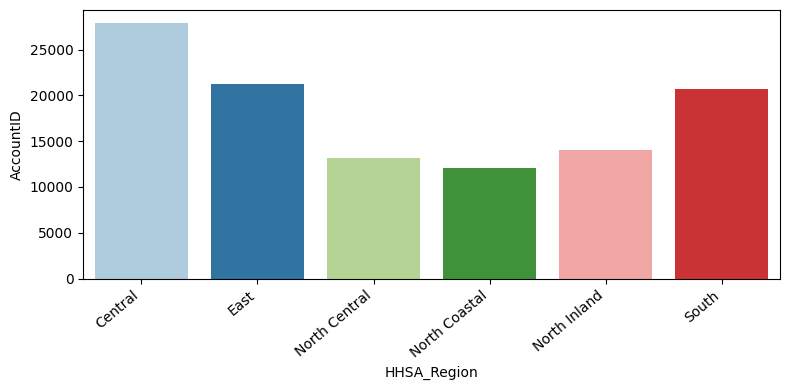

In [165]:
#testing counts by region, will use these to make a function

plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high

ax = sns.barplot(x='HHSA_Region', y='AccountID', data=temp_unstacked, palette="Paired") #generating axes with barplot
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #Rotating the xtick labels
plt.tight_layout() #tightening the layout so it's a bit easier to see
plt.show(); #Showing the plot

In [166]:
#Now building a function for it...

def quick_count_bar_plot(x,y, df):
    """
    Takes in two columns to generate a count_based barplot
    :param x: A string. Pandas column that you are grouping by
    :param y: A string. Pandas column you are generating counts by
    :param df: Pandas dataframe your x and y come from
    :return: Plotted y over x grouped by x
    """

    #This groupby makes it very easy to plot a barplot (next cell)
    temp_df = df[[y, x]].groupby([x]).count()
    temp_df.reset_index(inplace=True)
    print(temp_df)
    #It's taking the Account ID column and HHSA_Region column, then counting the number of Account IDs grouped by region

    #Title string generated
    title_string = str(y) + " counts grouped by " + str(x)

    #testing counts by region, will use these to make a function

    plt.figure(figsize=(8,6)) # this creates a figure 8 inch wide, 6 inch high

    ax = sns.barplot(x=x, y=y, data=temp_df, palette="Paired") #generating axes with barplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #Rotating the xtick labels
    ax.bar_label(ax.containers[0]) #adds count amounts to the top of each respective bar
    plt.title(title_string)
    plt.tight_layout() #tightening the layout so it's a bit easier to see


    plt.show();
    # Showing the plot

    #save_string = str(y) + "_counts_grouped_by_" + str(x).replace('/', '__')
    #plt.savefig(save_string)
    # saves the plot, uncomment if you want to do so


    return

    Gender  AccountID
0   Female      63303
1     Male      33296
2  Missing      24362
3    Other        105


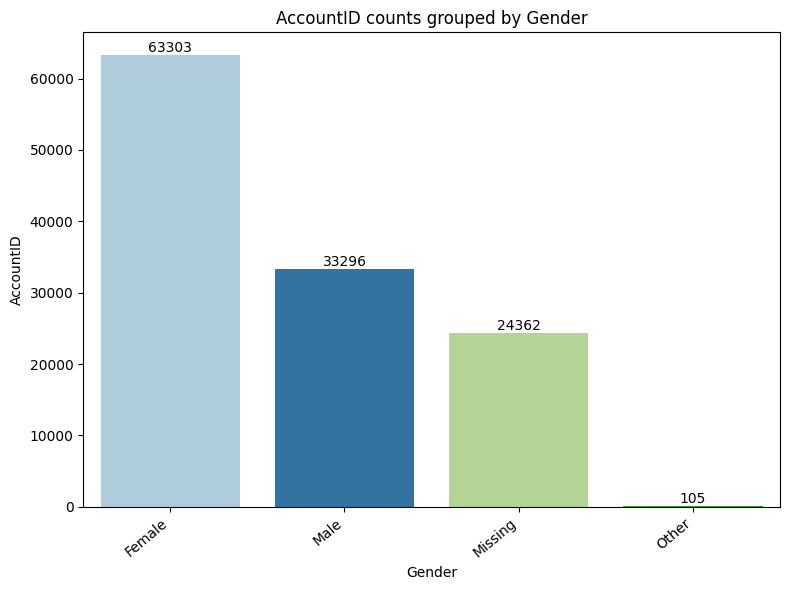

In [167]:
#Now we have a working bar_plot maker!

quick_count_bar_plot("Gender","AccountID",demographics)

In [168]:
#Removing numeric columns
demographics_no_numeric = demographics.select_dtypes(include=['object'])

#pulling list of column names
new_column_names = list(demographics_no_numeric.columns.values)

#plotting a bunch of barplots against AccountID
# for column in demographics_no_numeric:
#     if column != "AccountID":
#         quick_count_bar_plot(column,"AccountID",demographics_no_numeric)

In [169]:
print(demographics.Financial_Barriers_Assessment.unique())
print(demographics.Financial_Barriers_Assessment.isna())
print(demographics['Eviction__3-day_pay_or_quit_notice_Assessment'].unique())
print(demographics['Eviction__3-day_pay_or_quit_notice_Assessment'].isna())

#3  Financial_Barriers_Assessment                 34884 non-null   object
 #14  Eviction/3-day_pay_or_quit_notice_Assessment

[nan 'No/Not Known' 'Yes']
0         True
1         True
2         True
3         True
4         True
          ... 
121061    True
121062    True
121063    True
121064    True
121065    True
Name: Financial_Barriers_Assessment, Length: 121066, dtype: bool
[nan 'No/Not Known' 'Yes']
0         True
1         True
2         True
3         True
4         True
          ... 
121061    True
121062    True
121063    True
121064    True
121065    True
Name: Eviction__3-day_pay_or_quit_notice_Assessment, Length: 121066, dtype: bool


In [170]:
#  12  At_Risk_of_Losing_Housing_Assessment          34884 non-null   object
#  14  Eviction/3-day_pay_or_quit_notice_Assessment
demographics_At_Risk_and_Eviction_Notice_Nans_Removed = demographics[demographics["At_Risk_of_Losing_Housing_Assessment"] != "nan"]
demographics_At_Risk_and_Eviction_Notice_Nans_Removed = demographics[demographics["Eviction__3-day_pay_or_quit_notice_Assessment"] != "nan"]
demographics_At_Risk_and_Eviction_Notice_Nans_Removed.head()

,AccountID,Account_Created_Date,Record_Type,CIE_Consent,Zip,Neighborhood,HHSA_Region,County,Housing_Needs,Utilities_Needs,...,TANF,Rental_Assistance,Military__Veteran,Employment,Education,Health_Insurance,Health_Insurance_Type,Health_Plan,Homeless,Housing_Type
0,0012M000021P37VQAS,11/18/18,Client,No Consent,92040.0,LAKESIDE,East,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,Some College No Degree,Yes,Medi-Cal,Molina,Missing,Missing
1,0012M000021P9NyQAK,11/18/18,Client,No Consent,92064.0,POWAY,North Inland,San Diego,Yes,Yes,...,No,No,Not Military/Veteran,Unable to work,Associate Degree,Yes,Medi-Cal,Other,Yes,Unsheltered
2,0012M000021Pa72QAC,11/19/18,Client,Consent,92071.0,SANTEE,East,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,High School Degree,Yes,Employer Provided,Missing,Missing,Missing
3,0012M000021Pa8AQAS,11/19/18,Client,Consent,92110.0,"SD, OLD TOWN",North Central,San Diego,No,No,...,Missing,Missing,Not Military/Veteran,Missing,Missing,No,No Insurance,Missing,Yes,Homeless Unspecified
4,0012M000021PalPQAS,11/19/18,Client,Consent,91910.0,CHULA VISTA,South,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,Bachelor's Degree,Yes,Employer Provided,Missing,Missing,Missing


In [171]:
#Will turn this into a one line series function vs. loop so it'll run faster later on
i = 0 #index counter
for date in demographics_At_Risk_and_Eviction_Notice_Nans_Removed.Account_Created_Date: #for each date within the report

    #convert the date to datetime #11/18/18 #remember uppercase is full 4 digits, lowercase is short 2 digit
    datetime_object = datetime.strptime(date, '%m/%d/%y')

    #replacing based on index
    demographics_At_Risk_and_Eviction_Notice_Nans_Removed.at[i, 'Account_Created_Date'] = datetime_object
    i+=1
demographics_At_Risk_and_Eviction_Notice_Nans_Removed.head()

,AccountID,Account_Created_Date,Record_Type,CIE_Consent,Zip,Neighborhood,HHSA_Region,County,Housing_Needs,Utilities_Needs,...,TANF,Rental_Assistance,Military__Veteran,Employment,Education,Health_Insurance,Health_Insurance_Type,Health_Plan,Homeless,Housing_Type
0,0012M000021P37VQAS,2018-11-18 00:00:00,Client,No Consent,92040.0,LAKESIDE,East,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,Some College No Degree,Yes,Medi-Cal,Molina,Missing,Missing
1,0012M000021P9NyQAK,2018-11-18 00:00:00,Client,No Consent,92064.0,POWAY,North Inland,San Diego,Yes,Yes,...,No,No,Not Military/Veteran,Unable to work,Associate Degree,Yes,Medi-Cal,Other,Yes,Unsheltered
2,0012M000021Pa72QAC,2018-11-19 00:00:00,Client,Consent,92071.0,SANTEE,East,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,High School Degree,Yes,Employer Provided,Missing,Missing,Missing
3,0012M000021Pa8AQAS,2018-11-19 00:00:00,Client,Consent,92110.0,"SD, OLD TOWN",North Central,San Diego,No,No,...,Missing,Missing,Not Military/Veteran,Missing,Missing,No,No Insurance,Missing,Yes,Homeless Unspecified
4,0012M000021PalPQAS,2018-11-19 00:00:00,Client,Consent,91910.0,CHULA VISTA,South,San Diego,No,Yes,...,Missing,Missing,Not Military/Veteran,Full-Time,Bachelor's Degree,Yes,Employer Provided,Missing,Missing,Missing


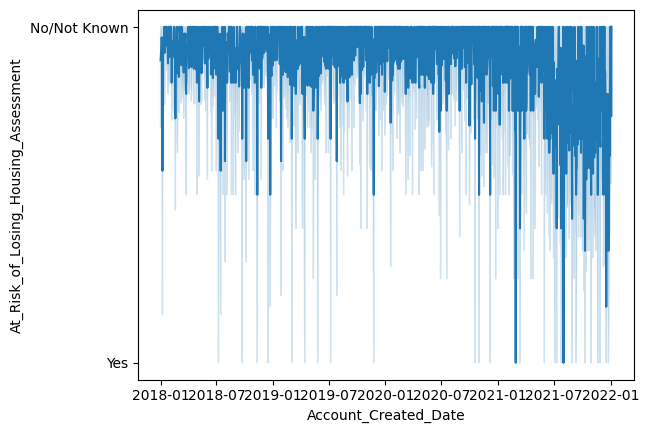

In [172]:
sns.lineplot(data = demographics_At_Risk_and_Eviction_Notice_Nans_Removed, x="Account_Created_Date", y="At_Risk_of_Losing_Housing_Assessment");

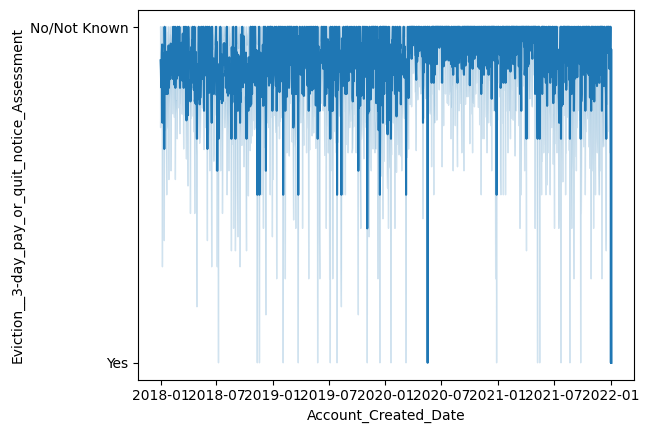

In [173]:
sns.lineplot(data = demographics_At_Risk_and_Eviction_Notice_Nans_Removed, x="Account_Created_Date", y="Eviction__3-day_pay_or_quit_notice_Assessment");

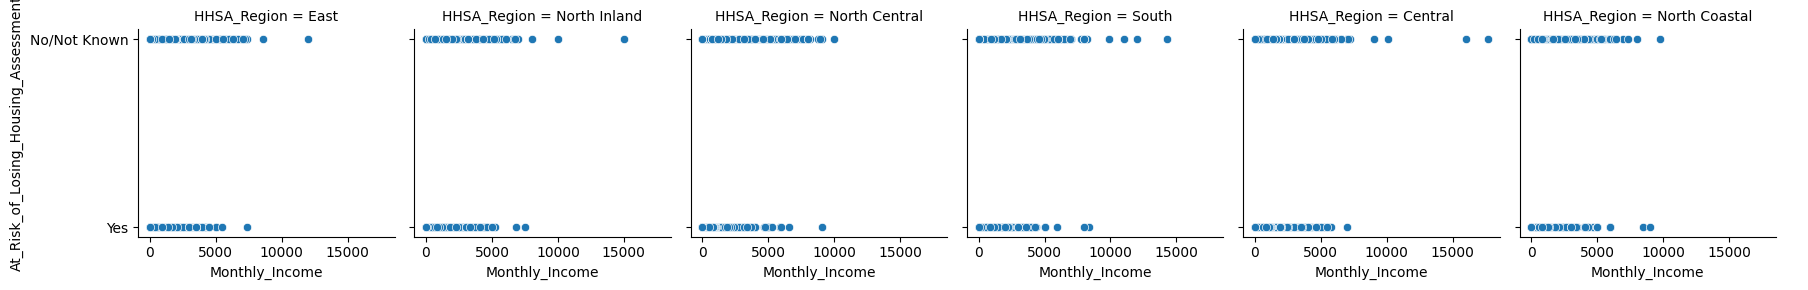

In [192]:
graph = sns.FacetGrid(data=demographics_At_Risk_and_Eviction_Notice_Nans_Removed, col="HHSA_Region")
graph.map(sns.scatterplot, "Monthly_Income", "At_Risk_of_Losing_Housing_Assessment")
graph.add_legend()

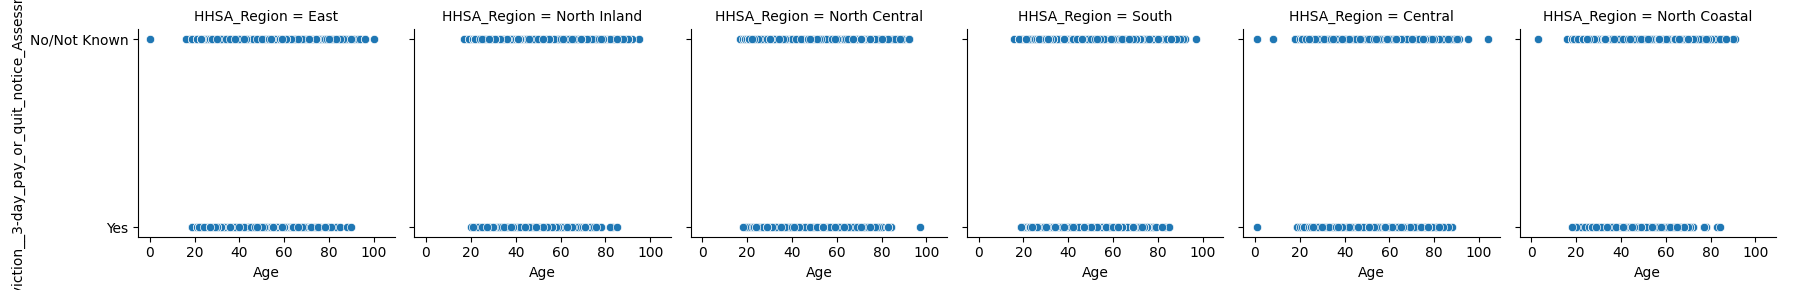

In [194]:
graph = sns.FacetGrid(data=demographics_At_Risk_and_Eviction_Notice_Nans_Removed, col="HHSA_Region")
graph.map(sns.scatterplot, "Age", "Eviction__3-day_pay_or_quit_notice_Assessment")
graph.add_legend()

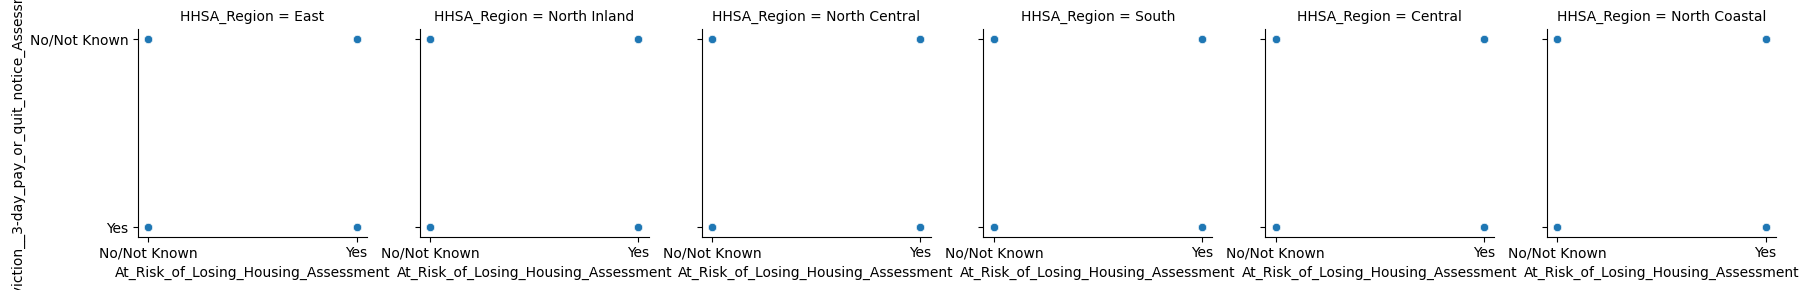

In [195]:
graph = sns.FacetGrid(data=demographics_At_Risk_and_Eviction_Notice_Nans_Removed, col="HHSA_Region")
graph.map(sns.scatterplot, "At_Risk_of_Losing_Housing_Assessment", "Eviction__3-day_pay_or_quit_notice_Assessment")
graph.add_legend()
#showing that the relation is not linear? Apply non-linearity?